# INTRODUCTION
---

- In this notebook, a neural network model is developed to predict the presence/absence of heart disease based on the following factors:

    1. age       
    2. sex       
    3. chest pain type  (4 values)       
    4. resting blood pressure  
    5. serum cholestoral in mg/dl      
    6. fasting blood sugar > 120 mg/dl       
    7. resting electrocardiographic results  (values 0,1,2) 
    8. maximum heart rate achieved  
    9. exercise induced angina    
    10. oldpeak = ST depression induced by exercise relative to rest   
    11. the slope of the peak exercise ST segment     
    12. number of major vessels (0-3) colored by flourosopy        
    13.  thal: 3 = normal; 6 = fixed defect; 7 = reversable defect     


- The dataset used to train and test the model is available in "heart.dat" and was obtained from this link: https://archive.ics.uci.edu/ml/datasets/Statlog+%28Heart%29

- A simple neural network was coded from scratch based on the tutorial available via this link: https://heartbeat.fritz.ai/building-a-neural-network-from-scratch-using-python-part-1-6d399df8d432. Please note that the network in the tutorial was modified to handle an arbitrary number of hidden layers. The original version was hard-coded for 1 hidden layer for clarity. Extension to multiple hidden layers was only a learning exercise. 

- To validate the custom neural network, its prediction accuracy on train and test data is compared to that of pre-built libraries, namely sci-kit learn and keras.

---

# IMPORT MODULES

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Split and scale data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import pre-built neural network model from sci-kit learn
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Import pre-built neural network model from tensor flow and keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# IMPORT DATA

In [2]:
# Column Headings (See heart.doc)
headers =  ['age', 'sex','chest_pain','resting_blood_pressure',  'serum_cholestoral', 'fasting_blood_sugar', 'resting_ecg_results','max_heart_rate_achieved', 
            'exercise_induced_angina', 'oldpeak',"slope of the peak",'num_of_major_vessels','thal', 'heart_disease']

# Read in data from 'heart.dat'
heart_dataset = pd.read_csv('heart.dat',sep=' ',names=headers)

# preview imported data
heart_dataset.head()

,age,sex,chest_pain,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_ecg_results,max_heart_rate_achieved,exercise_induced_angina,oldpeak,slope of the peak,num_of_major_vessels,thal,heart_disease
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [3]:
# print the shape of the imported data
print(f"The shape of imported heart dataset is {heart_dataset.shape}.")

The shape of imported heart dataset is (270, 14).


In [4]:
# check for missing values
print(f"{heart_dataset.isna().sum()}")

age                        0
sex                        0
chest_pain                 0
resting_blood_pressure     0
serum_cholestoral          0
fasting_blood_sugar        0
resting_ecg_results        0
max_heart_rate_achieved    0
exercise_induced_angina    0
oldpeak                    0
slope of the peak          0
num_of_major_vessels       0
thal                       0
heart_disease              0
dtype: int64


In [5]:
# check if all features are numeric
print(f"{heart_dataset.dtypes}")

age                        float64
sex                        float64
chest_pain                 float64
resting_blood_pressure     float64
serum_cholestoral          float64
fasting_blood_sugar        float64
resting_ecg_results        float64
max_heart_rate_achieved    float64
exercise_induced_angina    float64
oldpeak                    float64
slope of the peak          float64
num_of_major_vessels       float64
thal                       float64
heart_disease                int64
dtype: object


# SPLIT DATA INTO TRAIN AND TEST SET

In [6]:
# Isolate input data and convert to numpy arrays
X = heart_dataset.drop(columns=['heart_disease'])

# Target data ('heart_disease') takes on 1 or 2. Replace 1 with 0 and 2 with 1
# In the modified data, 1 corresponds with the presence of heart disease and 0 corresponds with absence of heart disease
heart_dataset['heart_disease'] = heart_dataset['heart_disease'].replace(1,0)
heart_dataset['heart_disease'] = heart_dataset['heart_disease'].replace(2,1)

y_label = heart_dataset['heart_disease'].values.reshape(X.shape[0],1)

# split data into train and test set (train set: 80%, test set: 20%)
# random_state of 2 for reproducibility... any other integer would serve the same purpose
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_label, test_size=0.2, random_state = 2)

# standardize input data
scaler = StandardScaler()
# compute the mean and standard deviation
scaler.fit(Xtrain)
# centering and scaling
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

# Show the shape of the train and test datasets
print(f"Shape of Xtrain set is {Xtrain.shape}")
print(f"Shape of Xtest set is {Xtest.shape}")
print(f"Shape of ytrain set is {ytrain.shape}")
print(f"Shape of ytest set is {ytest.shape}")

Shape of Xtrain set is (216, 13)
Shape of Xtest set is (54, 13)
Shape of ytrain set is (216, 1)
Shape of ytest set is (54, 1)


# NEURAL NETWORK FROM SCRATCH

In [7]:
class neuralNetwork():
    def __init__(self,layers=[13,4,4,1],learningRate=0.001,iterations=100):
        self.layers = layers
        self.learningRate = learningRate
        self.iterations = iterations
        self.params = {}
        self.X = None
        self.y = None
        self.loss = []
        self.nLayers = len(layers) - 1
    def initializeParameters(self):
        """
        Initialize weights and biases randomly
        """
        # seed random number generator
        np.random.seed(73)
        for i in range(0,self.nLayers):
            self.params['W'+str(i+1)] = np.random.randn(self.layers[i],self.layers[i+1])
            self.params['b'+str(i+1)] = np.random.randn(self.layers[i+1],)
    def rectifiedLinearUnit(self,z):
        """
        Hidden layer activation function
        """
        return np.maximum(0,z)
    def dRectifiedLinearUnit(self,x):
        """
        Derivative of rectified linear unit
        """
        xcopy = np.copy(x)
        xcopy = np.where(xcopy > 0, 1, xcopy)
        xcopy = np.where(xcopy <=0, 0, xcopy)
        return xcopy
    def sigmoid(self,z):
        """
        Output layer activation function
        """
        return 1/(1 + np.exp(-z))
    def dsigmoid(self,x):
        """
        Derivative of sigmoid activation function
        """
        return x*(1-x)
    def crossEntropyLoss(self,yhat):
        """
        Computes cross entropy loss -- binary classification
        """
        yInv = 1 - self.y
        yhat = np.maximum(1e-6,yhat)
        yhatInv = np.maximum(1-yhat,1e-6)
        nSamples = len(yhat)
        return -1/nSamples*np.sum((np.multiply(self.y,np.log(yhat)) + np.multiply(yInv,np.log(yhatInv))))
    def forward(self):
        """
        Performs forward propagation
        """
        for i in range(0,self.nLayers):
            if(i == 0):
                # First hidden layer
                Zi = self.X.dot(self.params['W'+str(i+1)]) + self.params['b'+str(i+1)]
                Ai = self.rectifiedLinearUnit(Zi)
            elif(i>0 and i < self.nLayers-1):
                # Other hidden layers
                Zi = Ai.dot(self.params['W'+str(i+1)]) + self.params['b'+str(i+1)]
                Ai = self.rectifiedLinearUnit(Zi)
            else:
                # Output layer
                Zi = Ai.dot(self.params['W'+str(i+1)]) + self.params['b'+str(i+1)]
                yhat = self.sigmoid(Zi)
                loss_ = self.crossEntropyLoss(yhat)
            # store Zi's and Ai's
            self.params['Z'+str(i+1)] = Zi
            self.params['A'+str(i+1)] = Ai
            
        return yhat,loss_
    def backward(self,yhat):
        """
        Performs back propagation
        """
        yhat = np.maximum(1e-6,yhat)
        yhatInv = np.maximum(1e-6,1-yhat)
        yInv = 1-self.y
        
        # Compute derivatives of the output layer
        dl_wrt_yhat = np.divide(yInv,yhatInv) - np.divide(self.y,yhat)  # derivative of loss with respect to predicted y
        dyhat_wrt_Zii = self.dsigmoid(yhat) # derivative of yhat with respect Z
        dZii_wrt_Wii = self.params['A'+str(self.nLayers-1)]     # derivative of Z3 with respect to W
        dZii_wrt_Ai = self.params['W'+str(self.nLayers)]     # derivative of Z3 with respect to A2
        
        dl_wrt_Wii = dZii_wrt_Wii.T.dot(dl_wrt_yhat*dyhat_wrt_Zii) # derivative of the loss with respect to the weights of the output layer, W3
        dl_wrt_bii = np.sum(dl_wrt_yhat*dyhat_wrt_Zii, axis=0,keepdims=True) # derivative of the loss with respect to the biases of the output layer, b3
        dl_wrt_Ai = (dl_wrt_yhat*dyhat_wrt_Zii).dot(dZii_wrt_Ai.T)
        
        # store derivatives of the output layer
        self.params['dlw'+str(self.nLayers)] = dl_wrt_Wii
        self.params['dlb'+str(self.nLayers)] = dl_wrt_bii
        
        # compute derivatives for hidden layers except the first one
        for i in range(self.nLayers-1,1,-1):
            dl_wrt_Aii = dl_wrt_Ai
            dAii_wrt_Zii = self.dRectifiedLinearUnit(self.params['Z'+str(i)])
            dZii_wrt_Wii = self.params['A'+str(i-1)]
            dZii_wrt_Ai = self.params['W'+str(i)]
        
            dl_wrt_Wii = dZii_wrt_Wii.T.dot(dl_wrt_Aii*dAii_wrt_Zii)
            dl_wrt_bii = np.sum(dl_wrt_Aii*dAii_wrt_Zii, axis=0,keepdims=True)
            dl_wrt_Ai = (dl_wrt_Aii*dAii_wrt_Zii).dot(dZii_wrt_Ai.T)
            
            # store derivatives of the hidden layer
            self.params['dlw'+str(i)] = dl_wrt_Wii
            self.params['dlb'+str(i)] = dl_wrt_bii
            
        # compute the derivatives of the first hidden layer
        dl_wrt_Aii = dl_wrt_Ai
        dAii_wrt_Zii = self.dRectifiedLinearUnit(self.params['Z1'])
        dZii_wrt_Wii = self.X
        
        dl_wrt_Wii = dZii_wrt_Wii.T.dot(dl_wrt_Aii*dAii_wrt_Zii)
        dl_wrt_bii = np.sum(dl_wrt_Aii*dAii_wrt_Zii, axis=0,keepdims=True)
            
        # store derivatives of the hidden layer
        self.params['dlw'+str(1)] = dl_wrt_Wii
        self.params['dlb'+str(1)] = dl_wrt_bii
        
        # Update weights and biases
        for i in range(0,self.nLayers):
            self.params['W'+str(i+1)] = self.params['W'+str(i+1)] - self.learningRate*self.params['dlw'+str(i+1)]
            self.params['b'+str(i+1)] = self.params['b'+str(i+1)] - self.learningRate*self.params['dlb'+str(i+1)]
        
    def fit(self,X,y):
        """
        Train the model
        """
        self.X = X
        self.y = y
        
        # initialize weights and biases
        self.initializeParameters()
        
        for i in range(0,self.iterations):
            yhat,loss_ = self.forward()
            self.backward(yhat)
            self.loss.append(loss_)
            
    def predict(self,X):
        """
        Predicts output based input data X
        """
        for i in range(0,self.nLayers):
            if(i == 0):
                # First hidden layer
                Zi = X.dot(self.params['W'+str(i+1)]) + self.params['b'+str(i+1)]
                Ai = self.rectifiedLinearUnit(Zi)
            elif(i>0 and i < self.nLayers-1):
                # Other hidden layers
                Zi = Ai.dot(self.params['W'+str(i+1)]) + self.params['b'+str(i+1)]
                Ai = self.rectifiedLinearUnit(Zi)
            else:
                # Output layer
                Zi = Ai.dot(self.params['W'+str(i+1)]) + self.params['b'+str(i+1)]
                pred = self.sigmoid(Zi)
        
        return np.round(pred)
    
    def accuracy(self,y,yhat):
        """
        Determines the accuracy of the model
        """
        acc = int(sum(y==yhat)/len(y)*100)
        return acc
    def plotLossCurve(self):
        """
        Plots loss curve
        """
        plt.plot(self.loss)
        plt.xlabel('Iterations')
        plt.ylabel('Cross Entropy Loss')
        plt.title('Loss Curve')
        plt.show()

# MODEL USING CUSTOM CODED NEURAL NETWORK

Model prediction accuracy on training data is 83%.
Model prediction accuracy on test data is 70%.


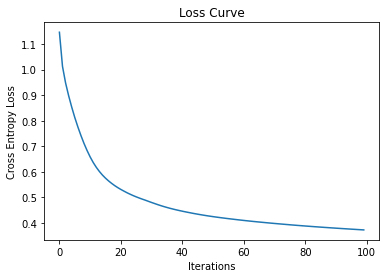

In [8]:
# specify architecture and other parameters
arch = [13,4,4,1]
learning_rate = 0.001
iterations_ = 100

# Build Model
nn = neuralNetwork(arch,learning_rate,iterations_)

# Train Model
nn.fit(Xtrain,ytrain)

# Model performance on training data
yhat_train = nn.predict(Xtrain)
acc_train = nn.accuracy(ytrain,yhat_train)
print(f'Model prediction accuracy on training data is {acc_train}%.')

# Model performance on test data
yhat_test = nn.predict(Xtest)
acc_test = nn.accuracy(ytest,yhat_test)
print(f'Model prediction accuracy on test data is {acc_test}%.')

# Plot loss curve
nn.plotLossCurve()

# MODEL USING SCI-KIT LEARN

In [9]:
# Specify model architecture and parameters
mlp = MLPClassifier(hidden_layer_sizes=(4,4), learning_rate_init=0.001, max_iter=100)

# Train Model
mlp.fit(Xtrain, ytrain)

# Model performance on training data
yhat_train = mlp.predict(Xtrain)
acc_train = round(accuracy_score(yhat_train, ytrain),2)*100
print(f'Model prediction accuracy on training data is {acc_train}%.')

# Model performance on test data
yhat_test = mlp.predict(Xtest)
acc_test = round(accuracy_score(yhat_test, ytest),2)*100
print(f'Model prediction accuracy on test data is {acc_test}%.')

Model prediction accuracy on training data is 55.00000000000001%.
Model prediction accuracy on test data is 59.0%.


# MODEL USING KERAS

In [10]:
# specify model architecture
model = Sequential()
model.add(Dense(4, input_shape=(13,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Build Model
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
model.fit(Xtrain, ytrain, epochs=100, verbose=0)

# Model Performance on training data
acc_train = model.evaluate(Xtrain, ytrain, verbose=0)[1]
print(f'Model prediction accuracy on training data is {acc_train*100}%.')

# Model performance on test data
acc_test = model.evaluate(Xtest, ytest, verbose=0)[1]
print(f'Model prediction accuracy on test data is {acc_test*100}%.')

Model prediction accuracy on training data is 87.5%.
Model prediction accuracy on test data is 75.9259283542633%.
